In [1]:
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
path = "data/Traffic_Violations_Processed.csv"
df = pd.read_csv(path, low_memory=False)

In [4]:
df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Description', 'Location', 'Latitude',
       'Longitude', 'Accident', 'Belts', 'Personal Injury', 'Property Damage',
       'Fatal', 'Alcohol', 'Work Zone', 'Search Conducted',
       'Search Disposition', 'Search Outcome', 'Search Reason', 'Search Type',
       'Search Arrest Reason', 'State', 'Year', 'Make', 'Color',
       'Violation Type', 'Race', 'Gender', 'Driver State', 'Year of Stop',
       'Month of Stop', 'Driver State Category',
       'License Plate State Category', 'Hour of Stop'],
      dtype='object')

In [6]:
df.head()

,Date Of Stop,Time Of Stop,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,...,Color,Violation Type,Race,Gender,Driver State,Year of Stop,Month of Stop,Driver State Category,License Plate State Category,Hour of Stop
0,2023-04-30,2023-11-28 23:55:00,Registration Violation,KEMP MILL ROAD @ ALPERT LANE,39.053038,-77.024637,No,No,No,No,...,RED,Citation,WHITE,F,MD,2023,4,in state,in state,23
1,2023-04-30,2023-11-28 04:24:00,NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,...,GRAY,Citation,BLACK,F,MD,2023,4,in state,in state,4
2,2023-04-30,2023-11-28 04:24:00,Reckless Driving,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,...,GRAY,Citation,BLACK,F,MD,2023,4,in state,in state,4
3,2023-04-30,2023-11-28 04:24:00,FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,...,GRAY,Citation,BLACK,F,MD,2023,4,in state,in state,4
4,2023-04-30,2023-11-28 04:24:00,DUI,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,No,No,No,...,GRAY,Citation,BLACK,F,MD,2023,4,in state,in state,4


In [5]:
# Group by 'Make' and 'Year' and aggregate 'Violation Type'
grouped_data = df.groupby(['Make', 'Year'])['Violation Type'].unique().reset_index()

# Display the result
for index, row in grouped_data.iterrows():
    make = row['Make']
    year = row['Year']
    violation_types = ', '.join(row['Violation Type'])
    
    print(f"Make: {make}, Year: {year}, Violation Types: {violation_types}")

Make: 'NISSAN, Year: 2013, Violation Types: Warning
Make: ,AZDA, Year: 2003, Violation Types: Warning
Make: ,EX, Year: 2012, Violation Types: Warning
Make: ,LEXUS, Year: 2015, Violation Types: Warning
Make: -, Year: 2016, Violation Types: Warning
Make: 00, Year: 2000, Violation Types: Citation
Make: 00, Year: 2500, Violation Types: Citation
Make: 0LDS, Year: 2000, Violation Types: Citation, Warning
Make: 125 DIRT BIKE, Year: 2018, Violation Types: Citation, Warning
Make: 180, Year: 2018, Violation Types: Warning
Make: 1995, Year: 1995, Violation Types: Citation
Make: 1999, Year: 1999, Violation Types: Citation
Make: 19UUA66257A0157, Year: 2007, Violation Types: Citation, Warning
Make: 19XFA1F58BE0143, Year: 2011, Violation Types: Warning
Make: 19XFA1F81AE0099, Year: 2010, Violation Types: Warning
Make: 1=TOYT, Year: 1997, Violation Types: Citation
Make: 1CG6099, Year: 2004, Violation Types: Warning
Make: 1D7HA18D54S7413, Year: 2004, Violation Types: Citation
Make: 1D7HA18N56J1034, Year

In [7]:
Violation_Type_mapping = {'Citation': 1, 'Warning': 2, 'ESERO': 3}

df['Violation Type Code'] = df['Violation Type'].map(Violation_Type_mapping)

grouped_data = df.groupby(['Make', 'Year'])['Violation Type Code'].mean().reset_index()


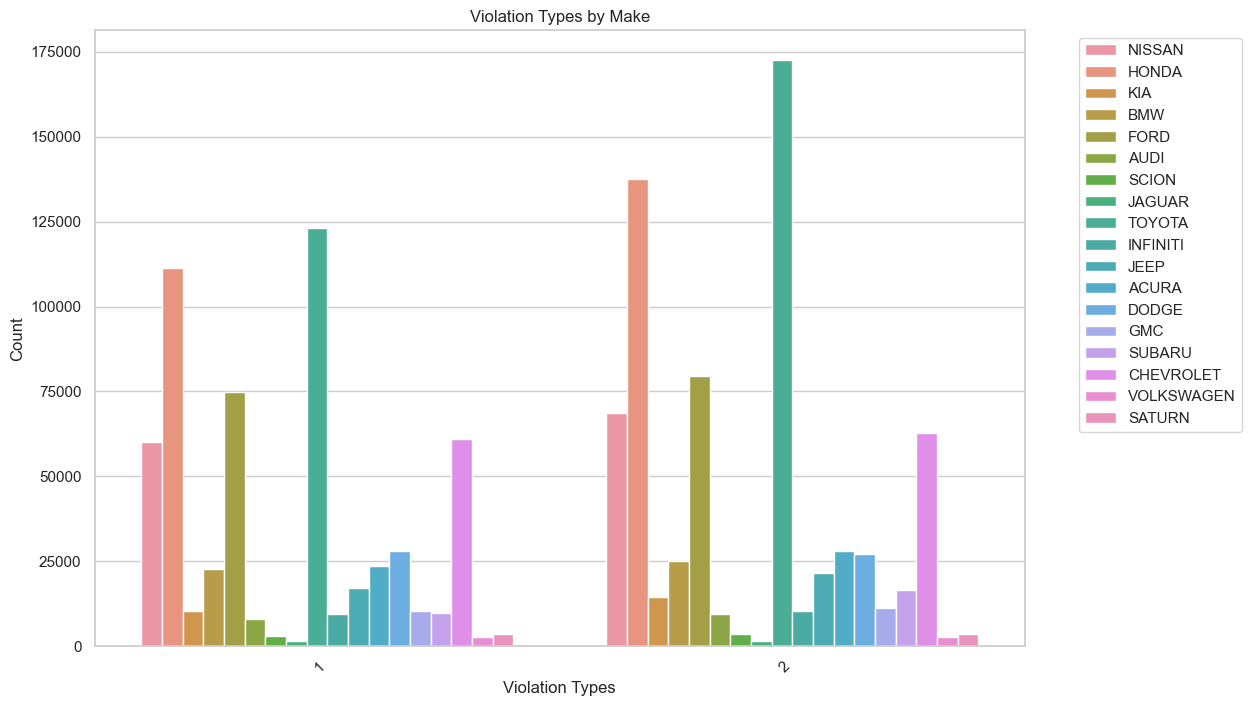

In [8]:
# Define a mapping for make names
make_mapping = {
    'ACURA': 'ACURA',
    'AUDI': 'AUDI',
    'BMW': 'BMW',
    'CHEV': 'CHEVROLET',
    'CHEVROLET': 'CHEVROLET',
    'CHEVY': 'CHEVROLET',
    'CHRY': 'CHRYSLER',
    'DODG': 'DODGE',
    'DODGE': 'DODGE',
    'FORD': 'FORD',
    'GMC': 'GMC',
    'HOND': 'HONDA',
    'HONDA': 'HONDA',
    'HYUN': 'HYUNDAI',
    'INFI': 'INFINITI',
    'INFINITY': 'INFINITI',
    'INFINITI': 'INFINITI',
    'JAGUAR': 'JAGUAR',
    'JEEP': 'JEEP',
    'KIA': 'KIA',
    'LEXS': 'LEXUS',
    'LINC': 'LINCOLN',
    'MAZD': 'MAZDA',
    'MERCEDES BENZ': 'MERCEDES-BENZ',
    'MERZ': 'MERCEDES-BENZ',
    'NISSAN': 'NISSAN',
    'RANGE ROVER': 'LAND ROVER',
    'SATURN': 'SATURN',
    'SCION': 'SCION',
    'SUBA': 'SUBARU',
    'SUBARU': 'SUBARU',
    'TOYOTA': 'TOYOTA',
    'TOYT': 'TOYOTA',
    'TOYTA': 'TOYOTA',
    'VOLK': 'VOLKSWAGEN',
    'VOLKSWAGEN': 'VOLKSWAGEN'
}

# Map the 'Make' column to the standardized make names
df['Standardized Make'] = df['Make'].map(make_mapping)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a countplot using Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(x='Violation Type Code', hue='Standardized Make', data=df)

# Customize the plot
plt.xlabel('Violation Types')
plt.ylabel('Count')
plt.title('Violation Types by Make')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [9]:
# Table of Violation types based on race and gender
violation_race_gender_table = pd.pivot_table(df, index=['Race', 'Gender'], columns='Violation Type', aggfunc='size', fill_value=0)

# Display the table
print("Table of Violation types based on Race and Gender:")
print(violation_race_gender_table)

Table of Violation types based on Race and Gender:
Violation Type          Citation  Warning
Race            Gender                   
ASIAN           F          12709    24282
                M          22826    34698
                U              8        5
BLACK           F          74087   102904
                M         173136   180892
                U             49       22
HISPANIC        F          37092    47714
                M         157537   121564
                U             62       25
NATIVE AMERICAN F            346      630
                M            971     1094
                U              1        3
OTHER           F          11910    22171
                M          27724    41114
                U            238     2248
WHITE           F          80856   131695
                M         156718   198426
                U             26       53


In [10]:
# Table of Violation types based on specified categories
violation_categories_table = pd.pivot_table(df, index=['Alcohol', 'Work Zone', 'Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal'], columns='Violation Type', aggfunc='size', fill_value=0)

# Display the table
print("\nTable of Violation types based on specified categories:")
print(violation_categories_table)



Table of Violation types based on specified categories:
Violation Type                                                          Citation  \
Alcohol Work Zone Accident Belts Personal Injury Property Damage Fatal             
No      No        No       No    No              No              No       661659   
                                                                 Yes         103   
                                                 Yes             No        15643   
                                 Yes             No              No         7592   
                           Yes   No              No              No        23927   
                                                                 Yes           2   
                                                 Yes             No         1685   
                                 Yes             No              No         1466   
                  Yes      No    No              No              No        17221   
                   